## Local Background + 5 Voigts
- This example fits a super dense diad using a local background. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append(r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests')
import DiadFit as pf

## Put folder here

In [2]:
# Add the path with your spectra in
path=r'C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra'
# Options, 'headless_txt', txt file with no title, 'Witec_ASCII' - witec txt with metadata, 'Renishaw_txt': txt with 2 headers, 'HORIBA_txt' - metadata+x-y- dat
filetype='headless_txt'
#True if has witec '01' in front.
prefix=False 

In [3]:
Diad_files=pf.get_diad_files(path)

In [4]:
Diad_files

['DiadFit_headlesstxt_Dense_Gaussian.ipynb',
 'DiadFit_headlesstxt_Dense_Local.ipynb',
 'FG04_10_MI1_2.txt',
 'ReadMe.txt',
 'WITEC_ASCII_MS14_11_MI1_50X.txt',
 'headless_txt_FG18_24_MI1.txt',
 'headless_txt_FG18_6_MI1.txt']

## Pick file here, e.g. each time scroll up to here and run the next cells

headless_txt_FG18_6_MI1.txt


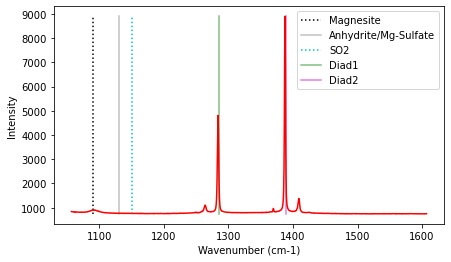

In [5]:
#filename=Diad_files[0] # or put ='FG04_10_MI1_2.txt'
filename='headless_txt_FG18_6_MI1.txt'
print(filename)
pf.plot_diad(path=path, filename=filename, filetype=filetype)

### This cell determins whether you want to proceed to fit a carbonate peak

Find Peaks also found major peaks at:
           pos      height
0  1091.616783  901.200012


,Carb_Cent,Carb_Area
0,1092.034977,2262.601496


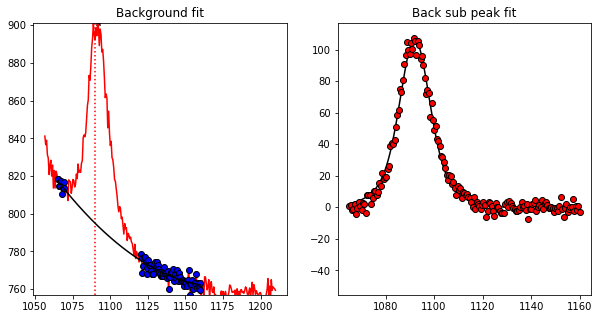

In [6]:
# If you select True, you can tweak the fit, if False, it will just run onto the next cell. 
fit_carbonate=True

# You can exclude a range here, e.g. if you have a nasty Cosmic ray
exclude_range=None#[1080, 1088]

# This selects the two background positions
lower_range=[1065, 1070]
upper_range=[1120, 1160]

# This sets the peak center, you can tweak if needed
cent=1090

# Tweak degree of poylnomial fitting the background
N_poly=2

# Select sigma level, e.g. discard points in background N* sigma outside mean
outlier_sigma=12

# N PEAKS - if you want approx peak positionYs
N_peaks=3

# Amplitude, may need to tweak
amplitude=1000


Carb_fit, xx_carb, y_carb, result0=pf.fit_carbonate_peak(path=path, 
filename=filename, filetype=filetype,
lower_range=lower_range, upper_range=upper_range, cent=cent, exclude_range=exclude_range,
N_poly=N_poly, outlier_sigma=outlier_sigma, N_peaks=N_peaks, amplitude=amplitude,
distance = 10, prominence=5, width=6  , threshold=0.1, fit_carbonate=fit_carbonate)
Carb_fit

## Plot diads to have a look, and get approx peak positions
- Choose how many peaks you want with

Using initial estimates: Diad1+HB=[1283.8 1263.6], Diad2+HB=[1387.6 1408.9]


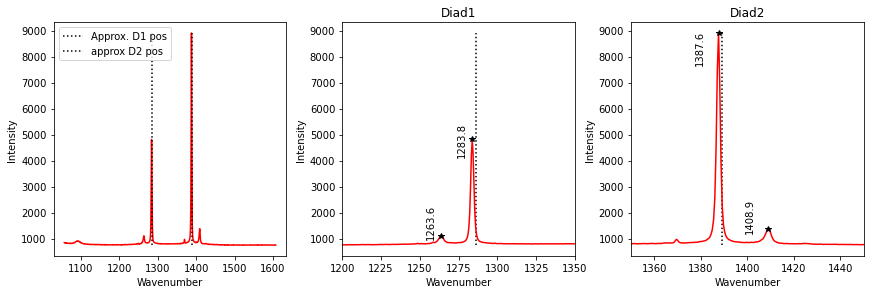

In [7]:
# If you have cosmic rays, you can remove up to 2 segments here (more if you ask penny nicely)
exclude_range1=None#[1320, 1340]#None
exclude_range2=None#[1236, 1250]
# Specify the number of peaks, e.g. 2 if have HB, 3 for Diad2 if have HB + C13, 1 if no HB
n_peaks_diad1=2
n_peaks_diad2=2


diad1_peaks, diad2_peaks=pf.identify_diad_peaks(path=path, filename=filename, filetype=filetype,
n_peaks_diad1=n_peaks_diad1, n_peaks_diad2=n_peaks_diad2,                                      
exclude_range1=exclude_range1,  exclude_range2=exclude_range2,
height = 400, threshold = 0.5, distance = 5, prominence=10, width=0.5)

In [8]:
# Uncomment this if you have no diads, it will export the carbonate peak parameters
#pf.proceed_to_fit_diads(filename, Carb_fit)

## Fit Diad 1

6.503344412036914
1263.6961471536433
1283.783741602148
C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra


,Diad1_Cent,Diad1_Area,HB1_Cent,HB1_Area,Residual_Diad1
0,1283.783742,12600.082496,1263.696147,1542.998466,12.512376


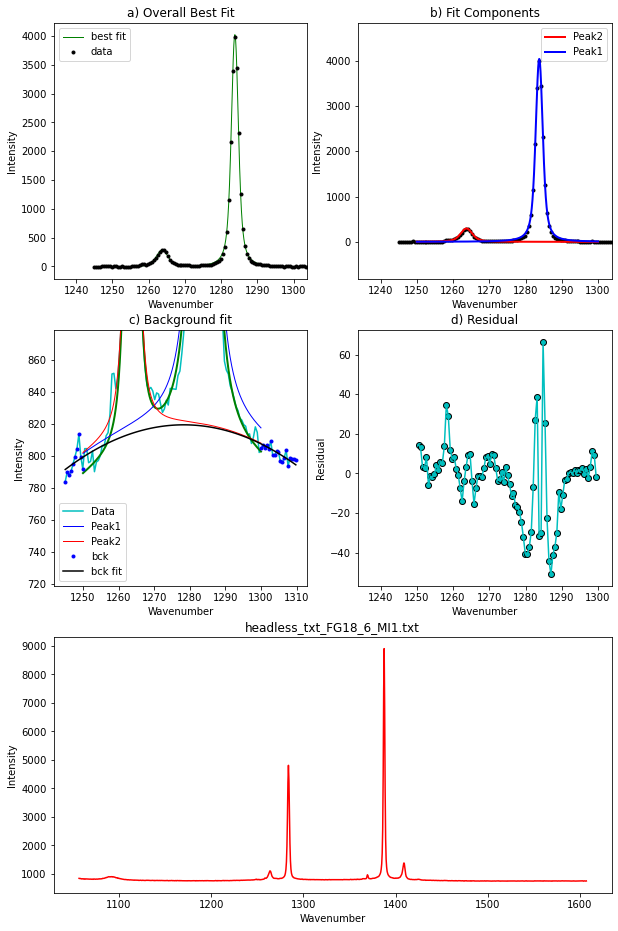

In [9]:
# If you enter a number here, it will fit a Gaussian background centered near the peak pos.. Else, if None, it wont.  Gaussian or not, either enter approximate center of Guassian, or None
peak_pos_gauss=None
# Degree of polynomail for the background
N_poly_bck_diad1=2
# LH range to use as baseline for the diad
lower_baseline_diad1=[1245, 1250]
# RH range to use as baseline for the diad
upper_baseline_diad1=[1300, 1310]
## Change amplitude
amplitude=50


Diad1_fit, result_diad1, best_fit_diad1, xdat_diad1=pf.fit_diad_1_w_bck(path=path, 
filename=filename, filetype=filetype,
exclude_range1=exclude_range1, exclude_range2=exclude_range2,
N_poly_bck_diad1=N_poly_bck_diad1, lower_baseline_diad1=lower_baseline_diad1,
upper_baseline_diad1=upper_baseline_diad1,
peak_pos_voigt=diad1_peaks, peak_pos_gauss=peak_pos_gauss, amplitude=amplitude)
Diad1_fit

## Fit diad 2

11.892709543039336
made df
C:\Users\penny\OneDrive - Oregon State University\Postdoc\MeltInclusion_SampleStuff\Peak_Fitting_Tests\Example_notebooks_Spectra


,Diad2_Cent,Diad2_Area,HB2_Cent,HB2_Area,Residual_Diad2
0,1387.58183,20084.465635,1407.983006,1142.118172,31.035937


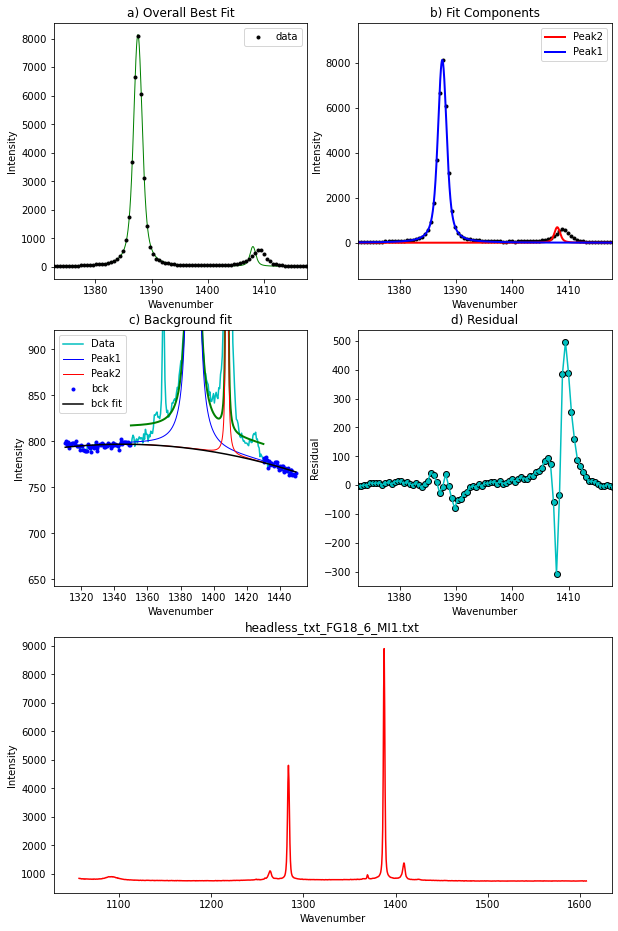

In [15]:
# Gaussian or not, either enter approximate center of Guassian, or None
peak_pos_gauss=None
# Degree of polynomail for the background
N_poly_bck_diad2=2
# LH range to use as baseline for the diad
lower_baseline_diad2=[1310, 1350]
# RH range to use as baseline for the diad
upper_baseline_diad2=[1430, 1450]
# Tweak amplitude if needed
amplitude=50
# This then takes these inputs and feeds them into the function
Diad2_fit, result_diad2, best_fit_diad2, xdat_diad2 =pf.fit_diad_2_w_bck(path=path, filename=filename, filetype=filetype, peak_pos_voigt=diad2_peaks,
exclude_range1=exclude_range1, exclude_range2=exclude_range2, N_poly_bck_diad2=N_poly_bck_diad2, 
lower_baseline_diad2=lower_baseline_diad2, upper_baseline_diad2=upper_baseline_diad2, peak_pos_gauss=peak_pos_gauss, amplitude=amplitude)
Diad2_fit

## Combine and copy to clipboard!

In [11]:
out=pf.combine_diad_outputs(filename=filename, prefix=prefix, Diad1_fit=Diad1_fit, 
                        Diad2_fit=Diad2_fit, Carb_fit=Carb_fit)
out

,filename,Splitting,Diad1_Cent,Diad1_Area,Residual_Diad1,Diad2_Cent,Diad2_Area,Residual_Diad2,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area,Carb_Cent,Carb_Area,Carb_Area/Diad_Area
0,headless_txt_FG18_6_MI1,103.79765,1283.783877,12676.728944,7.108585,1387.581527,20036.263066,7.255204,1263.711755,1568.74144,1408.985973,2337.080298,1369.603842,287.96922,1092.034977,2262.601496,0.069165
